# predicting which employee will leave the compnany

In [78]:
import numpy as np
import pandas as pd

In [79]:
hr_df = pd.read_csv('hr_data.csv')


In [80]:
hr_df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low


In [81]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [82]:
hr_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [83]:
hr_df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [84]:
hr_df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [85]:
s_df = pd.read_excel("employee_satisfaction_evaluation.xlsx")
s_df

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52
...,...,...,...
14994,87670,0.40,0.57
14995,87673,0.37,0.48
14996,87679,0.37,0.53
14997,87681,0.11,0.96


In [86]:
main_df = hr_df.set_index("employee_id").join(s_df.set_index("EMPLOYEE #"))


joining both the data frames and using employee id as parameter to join

In [87]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
1003,2,157,3,0,1,0,sales,low,0.38,0.53
1005,5,262,6,0,1,0,sales,medium,0.80,0.86
1486,7,272,4,0,1,0,sales,medium,0.11,0.88
1038,5,223,5,0,1,0,sales,low,0.72,0.87
1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...
87670,2,151,3,0,1,0,support,low,0.40,0.57
87673,2,160,3,0,1,0,support,low,0.37,0.48
87679,2,143,3,0,1,0,support,low,0.37,0.53


In [88]:
main_df = main_df.reset_index()
#get default indexes

In [89]:
main_df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low,0.40,0.57
14995,87673,2,160,3,0,1,0,support,low,0.37,0.48
14996,87679,2,143,3,0,1,0,support,low,0.37,0.53
14997,87681,6,280,4,0,1,0,support,low,0.11,0.96


In [90]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14972 non-null  float64
 10  last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [91]:
main_df.isnull().any()

employee_id              False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
satisfaction_level        True
last_evaluation           True
dtype: bool

In [92]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [93]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
main_df.fillna(main_df.mean(),inplace=True)

In [95]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation


In [96]:
main_df.drop(columns="employee_id", inplace=True)

In [97]:
main_df.groupby("department").sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [98]:
main_df.groupby("department").mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [99]:
main_df["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

# Plotting

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
corr = main_df.corr()
corr

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
number_project,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.143895,0.348776
average_montly_hours,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.020886,0.339014
time_spend_company,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.101165,0.131078
Work_accident,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.059063,-0.006779
left,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.388282,0.006876
promotion_last_5years,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.025925,-0.007815
satisfaction_level,-0.143895,-0.020886,-0.101165,0.059063,-0.388282,0.025925,1.000000,0.103783
last_evaluation,0.348776,0.339014,0.131078,-0.006779,0.006876,-0.007815,0.103783,1.000000


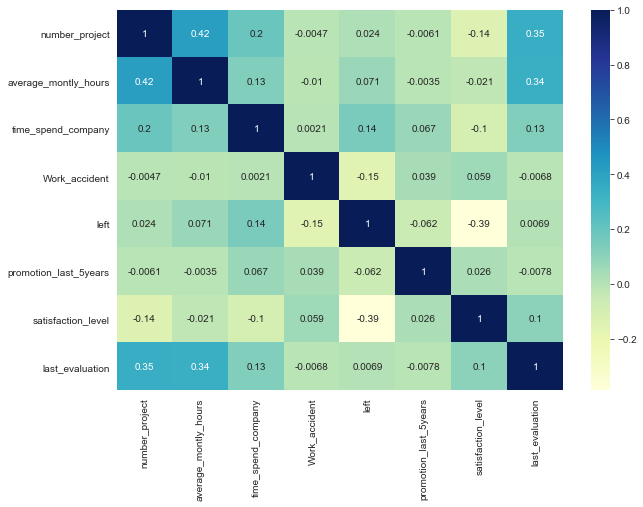

In [102]:
def plot_corr(df):
    corr = df.corr()
    plt.figure(figsize=(10,7))
    sns.color_palette("pastel")
    sns.set_style("darkgrid")
    sns.heatmap(corr ,annot=True, cmap = "YlGnBu")

plot_corr(main_df)

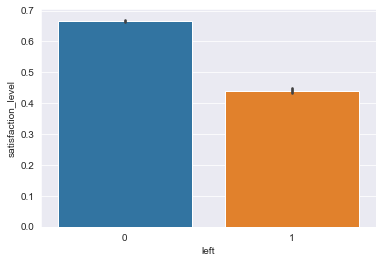

In [103]:
sns.barplot(x=main_df['left'] , y=main_df['satisfaction_level'])

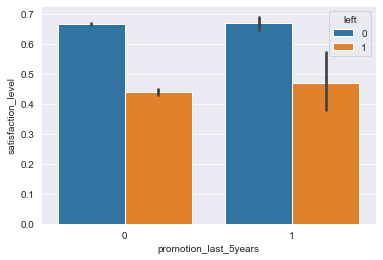

In [104]:
sns.barplot(x='promotion_last_5years',y='satisfaction_level',data=main_df,hue='left')

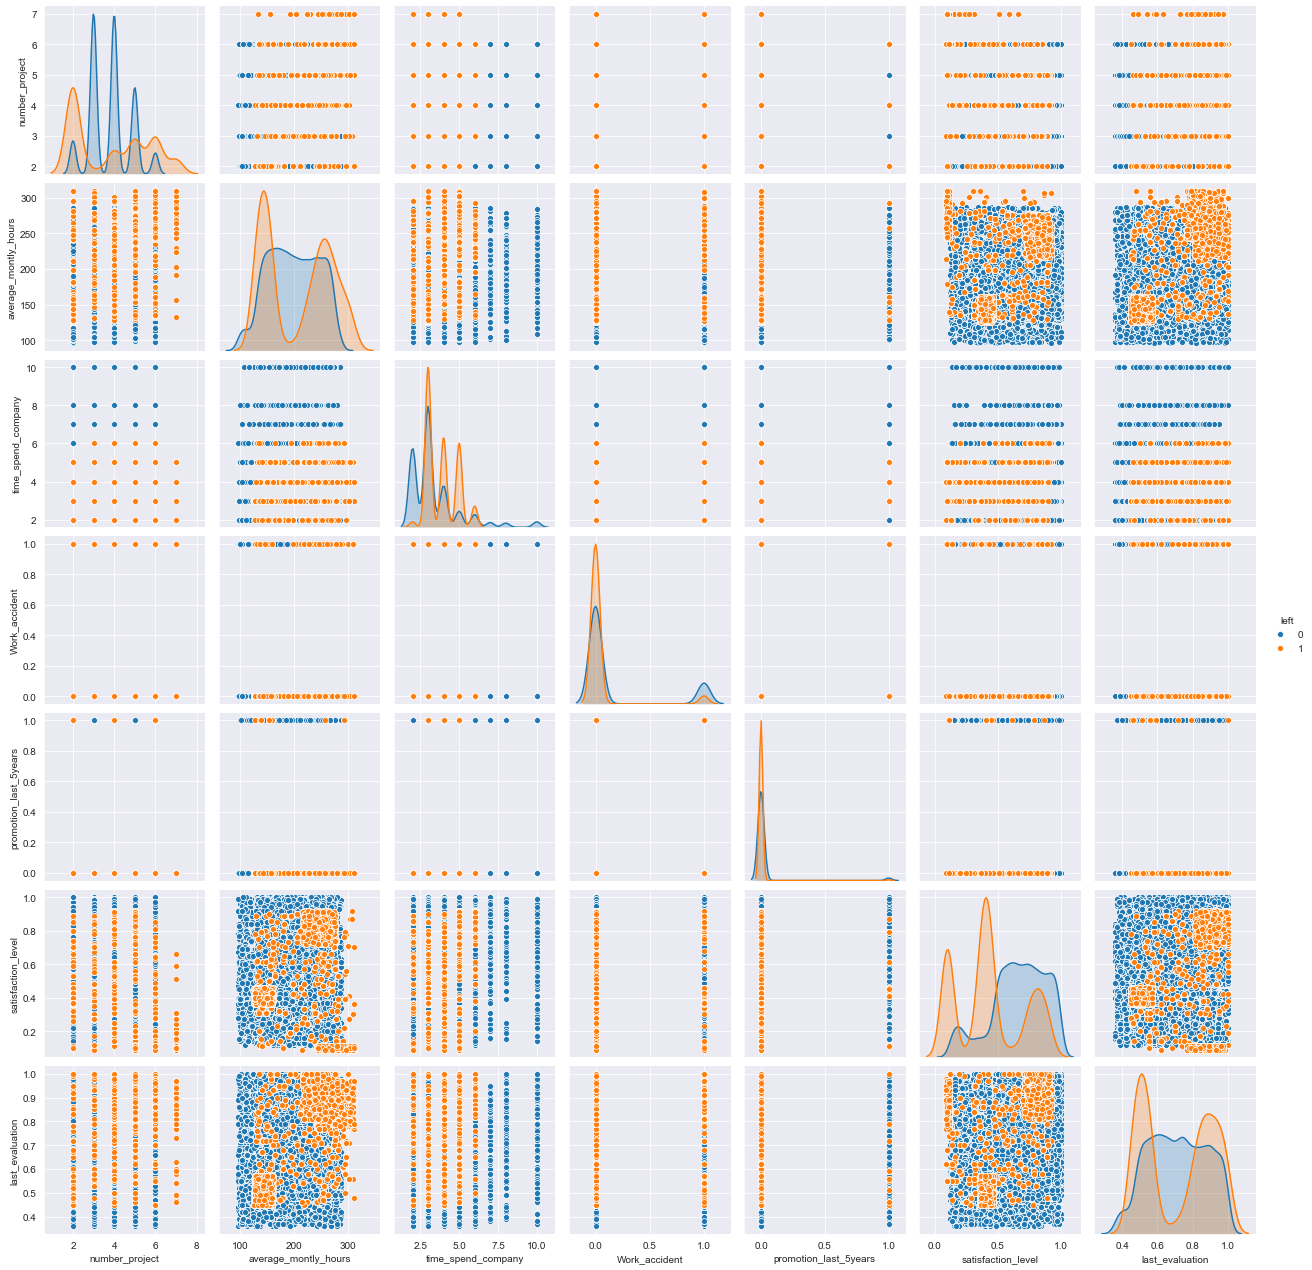

In [105]:
sns.pairplot(main_df,hue='left')

# converting data to numerical form

In [106]:
y=main_df[['salary' , 'department']]
y

,salary,department
0,low,sales
1,medium,sales
2,medium,sales
3,low,sales
4,low,sales
...,...,...
14994,low,support
14995,low,support
14996,low,support
14997,low,support


In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
k=le.fit_transform(main_df['salary'])
k

array([1, 2, 2, ..., 1, 1, 1])

In [108]:
main_df['salary_num'] = k

In [109]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,salary_num
0,2,157,3,0,1,0,sales,low,0.38,0.53,1
1,5,262,6,0,1,0,sales,medium,0.80,0.86,2
2,7,272,4,0,1,0,sales,medium,0.11,0.88,2
3,5,223,5,0,1,0,sales,low,0.72,0.87,1
4,2,159,3,0,1,0,sales,low,0.37,0.52,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,low,0.40,0.57,1
14995,2,160,3,0,1,0,support,low,0.37,0.48,1
14996,2,143,3,0,1,0,support,low,0.37,0.53,1
14997,6,280,4,0,1,0,support,low,0.11,0.96,1


In [110]:
main_df[main_df['salary'] == 'high']

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,salary_num
72,2,149,3,0,1,0,product_mng,high,0.61283,0.716125,0
111,6,289,4,0,1,0,hr,high,0.09000,0.850000,0
189,2,156,3,0,1,0,technical,high,0.44000,0.510000,0
267,2,129,3,0,1,0,technical,high,0.45000,0.530000,0
306,2,149,3,0,1,0,marketing,high,0.37000,0.460000,0
...,...,...,...,...,...,...,...,...,...,...,...
14829,2,148,3,0,1,0,marketing,high,0.45000,0.570000,0
14868,2,130,3,0,1,0,support,high,0.43000,0.550000,0
14902,2,159,3,0,1,0,hr,high,0.45000,0.460000,0
14941,2,131,3,0,1,0,RandD,high,0.43000,0.490000,0


In [111]:
main_df.drop(columns='salary' , inplace=True)

In [112]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,satisfaction_level,last_evaluation,salary_num
0,2,157,3,0,1,0,sales,0.38,0.53,1
1,5,262,6,0,1,0,sales,0.80,0.86,2
2,7,272,4,0,1,0,sales,0.11,0.88,2
3,5,223,5,0,1,0,sales,0.72,0.87,1
4,2,159,3,0,1,0,sales,0.37,0.52,1
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,0.40,0.57,1
14995,2,160,3,0,1,0,support,0.37,0.48,1
14996,2,143,3,0,1,0,support,0.37,0.53,1
14997,6,280,4,0,1,0,support,0.11,0.96,1


In [113]:
z= le.fit_transform(main_df['department'])

In [114]:
z

array([7, 7, 7, ..., 8, 8, 8])

In [115]:
main_df['department_num'] = z

In [116]:
main_df.drop(columns="department",inplace=True)

In [117]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,department_num
0,2,157,3,0,1,0,0.38,0.53,1,7
1,5,262,6,0,1,0,0.80,0.86,2,7
2,7,272,4,0,1,0,0.11,0.88,2,7
3,5,223,5,0,1,0,0.72,0.87,1,7
4,2,159,3,0,1,0,0.37,0.52,1,7
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,0.40,0.57,1,8
14995,2,160,3,0,1,0,0.37,0.48,1,8
14996,2,143,3,0,1,0,0.37,0.53,1,8
14997,6,280,4,0,1,0,0.11,0.96,1,8


In [118]:
X = main_df.drop(columns="left")

In [119]:
y = main_df['left']

# Decision tree

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size=0.3)

In [121]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [122]:
dt_predict =dt.predict(X_test)

In [146]:
accuracy_dt= accuracy_score(y_test,dt_predict)*100

In [124]:
category = ['Employee will not leave' , 'Employee will leave']

In [125]:
custom_dt=[[1,500,3,6,0,0.90,0.89,1,8]]

In [126]:
category[int(dt.predict(custom_dt))]

'Employee will leave'

In [127]:
dt.feature_importances_

array([9.41328105e-02, 1.03281104e-01, 1.38585997e-01, 2.39273408e-04,
       1.13451835e-04, 4.98404684e-01, 1.44023951e-01, 3.84117431e-03,
       1.73775537e-02])

In [128]:
feature_importance=pd.DataFrame(dt.feature_importances_,index=X_train.columns,columns=['Importance']).sort_values('Importance',ascending=False)

In [129]:
feature_importance

,Importance
satisfaction_level,0.498405
last_evaluation,0.144024
time_spend_company,0.138586
average_montly_hours,0.103281
number_project,0.094133
department_num,0.017378
salary_num,0.003841
Work_accident,0.000239
promotion_last_5years,0.000113


# KNN 

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
sc = StandardScaler().fit(X_train)
sc

StandardScaler(copy=True, with_mean=True, with_std=True)

In [132]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [133]:
X_train_std

array([[ 0.96797852, -0.40482058, -0.3430931 , ...,  1.12780377,
        -0.54912327,  0.39710726],
       [ 1.7774414 , -1.72358914, -0.3430931 , ..., -1.79518098,
        -0.54912327,  0.39710726],
       [-0.65094724, -0.66457802, -1.02557405, ..., -1.26904373,
         1.05100029, -0.30143159],
       ...,
       [ 1.7774414 ,  1.77314568,  0.33938785, ...,  0.30936804,
         1.05100029,  1.09564611],
       [-0.65094724, -0.92433546, -1.02557405, ..., -1.38596312,
         1.05100029,  1.09564611],
       [-0.65094724,  0.73411591, -1.02557405, ...,  0.66012621,
         1.05100029,  0.74637669]])

In [134]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [135]:
prediction_knn=knn.predict(X_test_std)


In [136]:
accuracy_knn=accuracy_score(y_test,prediction_knn)*100

In [137]:
accuracy_knn

95.8

In [138]:
k_range = range(1,26)
print(k_range)
scores = {}
scores_list =[]

range(1, 26)


In [139]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std , y_train)
    pred =knn.predict(X_test_std)
    scores[k] =accuracy_score(y_test ,pred)*100
    scores_list.append(accuracy_score(y_test , pred)*100)

In [140]:
print(scores)

{1: 96.95555555555555, 2: 96.64444444444445, 3: 95.8, 4: 95.77777777777777, 5: 95.55555555555556, 6: 95.6, 7: 95.31111111111112, 8: 95.37777777777777, 9: 95.0, 10: 95.19999999999999, 11: 95.06666666666666, 12: 95.17777777777778, 13: 94.86666666666666, 14: 94.95555555555556, 15: 94.68888888888888, 16: 94.66666666666667, 17: 94.44444444444444, 18: 94.62222222222222, 19: 94.37777777777778, 20: 94.42222222222222, 21: 94.31111111111112, 22: 94.33333333333334, 23: 94.22222222222221, 24: 94.35555555555555, 25: 94.24444444444444}


In [141]:
print(scores_list)

[96.95555555555555, 96.64444444444445, 95.8, 95.77777777777777, 95.55555555555556, 95.6, 95.31111111111112, 95.37777777777777, 95.0, 95.19999999999999, 95.06666666666666, 95.17777777777778, 94.86666666666666, 94.95555555555556, 94.68888888888888, 94.66666666666667, 94.44444444444444, 94.62222222222222, 94.37777777777778, 94.42222222222222, 94.31111111111112, 94.33333333333334, 94.22222222222221, 94.35555555555555, 94.24444444444444]


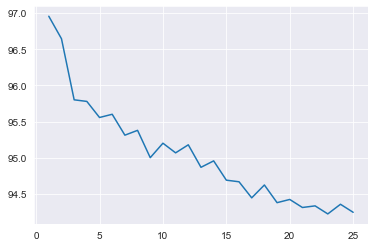

In [142]:
plt.plot(k_range , scores_list)

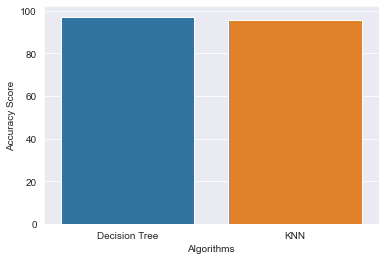

In [147]:
algorithms=['Decision Tree','KNN']
sc=[accuracy_dt,accuracy_knn]


plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
sns.barplot(algorithms,sc)
plt.show()